# GP2 Code

In [65]:
import pandas as pd

#load each CSV file
patients_data = pd.read_csv('/content/drive/MyDrive/Cluster/dataset_cleaned/integrated_patients_data.csv')

#display the first few rows
patients_data.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,upd23b_On,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,55_0,55,0,10.0,6.0,15.0,0.0,1,0.0,0.0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500
1,55_6,55,6,8.0,10.0,34.0,0.0,1,0.0,0.0,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,1.0,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230
3,55_36,55,36,17.0,18.0,51.0,0.0,0,0.0,1.0,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,942_6,942,6,8.0,2.0,21.0,0.0,1,0.0,0.0,...,-0.523902,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559


In [ ]:
patients_data.shape

(2183, 1202)

In [ ]:
patients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Columns: 1202 entries, visit_id to AGC(UniMod_4)VAESTAVC(UniMod_4)R
dtypes: float64(1198), int64(3), object(1)
memory usage: 20.0+ MB


In [ ]:
patients_data.isnull().sum()

,0
visit_id,0
patient_id,0
visit_month,0
updrs_1,0
updrs_2,0
...,...
QKVEPLRAELQEGAR,0
RTHLPEVFLSK,0
INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,0
EQPPSLTR,0


There are no missing values

# Clustering

In [66]:
data = patients_data

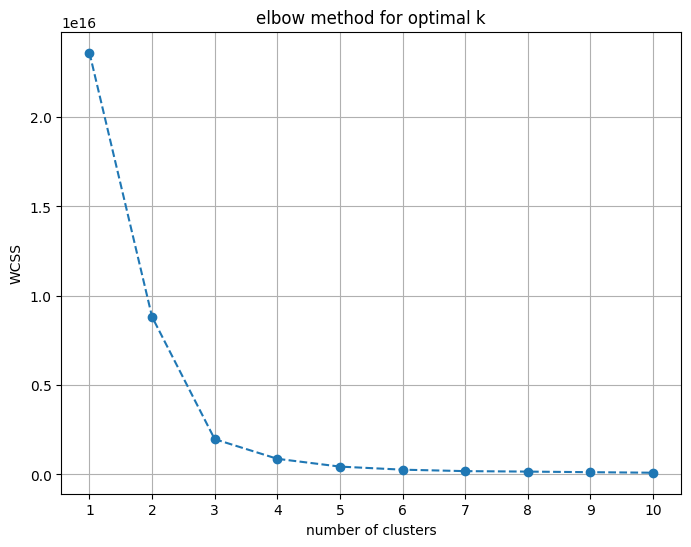

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#range for the number of clusters to test
cluster_range = range(1, 11)

wcss = []

#compute WCSS for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(patients_data)
    wcss.append(kmeans.inertia_)

#plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('elbow method for optimal k')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid()
plt.show()


In [27]:
#excluded_columns = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

#extracting proteins and peptides features
X = patients_data.iloc[:, 10:]  #selects all columns from the 11th onward (0-based indexing)
#y = patients_data[excluded_columns]

print("Features shape:", X.shape)
#print("Target shape:", y.shape)

Features shape: (2183, 1192)


In [ ]:
X

,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,-0.124879,0.955709,1.225520,1.676400,1.889746,1.033048,0.830553,0.577115,1.483745,0.377631,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500
1,0.553678,0.519166,0.817095,1.649031,1.188844,1.159459,0.719035,0.561695,1.045231,0.438227,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,1.297876,1.309572,1.418748,1.468253,1.815104,1.117086,0.573884,0.766666,1.476698,0.106189,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230
3,0.684179,1.047338,1.549556,1.909699,2.216530,1.656328,-0.060218,0.795834,1.366268,-0.384336,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,-0.137531,-0.469587,-0.552725,0.468303,-1.611125,-0.225919,0.669597,-0.331029,-0.200897,-1.036749,...,-0.523902,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,-0.321861,-0.100437,0.153659,-0.510866,-0.029485,-1.502180,0.165454,-0.038447,-0.498143,-0.844333,...,-1.228121,0.128090,-0.191178,0.217204,-1.129771,-8.969155e-01,-0.076178,-0.224955,-1.555860,0.408790
2179,-1.393288,-0.673395,-0.455031,-1.134291,0.438775,-1.133440,-0.646846,-0.902232,-2.053597,-0.464298,...,-1.604788,-0.196753,0.211542,0.002092,-1.582692,-1.102500e+00,-0.785207,0.521680,-0.947157,-1.840102
2180,-0.655243,-0.921821,-0.144627,-0.817337,-0.495748,-0.777806,-0.524425,-0.687029,-1.213980,-0.532713,...,-0.993341,-0.119032,-0.386454,0.375275,0.377264,2.597195e-01,-0.726791,0.198471,-1.005968,-0.524933
2181,0.663424,1.792806,1.513308,1.928536,0.330038,0.400433,1.468068,3.141162,1.815527,1.751018,...,1.181329,-1.243043,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741


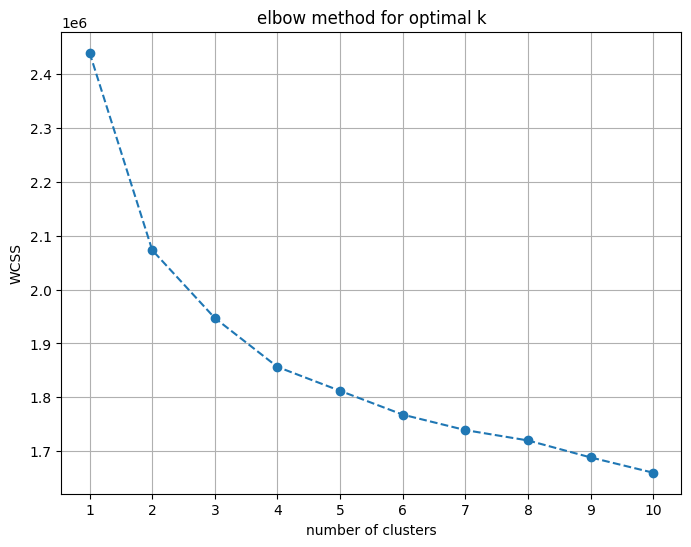

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#range for the number of clusters to test
cluster_range = range(1, 11)

wcss = []

#compute WCSS for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('elbow method for optimal k')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [64]:
from math import e
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, AgglomerativeClustering, MeanShift, estimate_bandwidth,OPTICS
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X_values = X.values

# results
modified_results = []

In [ ]:
# K-Means Clustering
for k in range(3, 6):  #testing different cluster counts
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_values)
    kmeans_silhouette = silhouette_score(X_values, kmeans_labels)
    modified_results.append({'Algorithm': 'K-Means', 'Clusters': k, 'Silhouette Score': kmeans_silhouette})
    print(f"K-Means (k={k}): Silhouette Score = {kmeans_silhouette:.3f}")


K-Means (k=3): Silhouette Score = 0.084
K-Means (k=4): Silhouette Score = 0.083
K-Means (k=5): Silhouette Score = 0.071


In [ ]:
# Hierarchical Clustering
for k in range(3, 6):  #testing different cluster counts
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(X_values)
    hierarchical_silhouette = silhouette_score(X_values, hierarchical_labels)
    modified_results.append({'Algorithm': 'Hierarchical', 'Clusters': k, 'Silhouette Score': hierarchical_silhouette})
    print(f"Hierarchical (k={k}): Silhouette Score = {hierarchical_silhouette:.3f}")




Hierarchical (k=3): Silhouette Score = 0.074
Hierarchical (k=4): Silhouette Score = 0.043
Hierarchical (k=5): Silhouette Score = 0.048


In [ ]:
# Affinity Propagation
affinity = AffinityPropagation(random_state=42)
affinity_labels = affinity.fit_predict(X_values)
if len(np.unique(affinity_labels)) > 1:  #avoiding silhouette calculation if only one cluster
    affinity_silhouette = silhouette_score(X_values, affinity_labels)
    modified_results.append({'Algorithm': 'Affinity Propagation', 'Clusters': len(np.unique(affinity_labels)), 'Silhouette Score': affinity_silhouette})
    print(f"Affinity Propagation: Silhouette Score = {affinity_silhouette:.3f}, Clusters = {len(np.unique(affinity_labels))}")
else:
    print("Affinity Propagation did not converge.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning:

Affinity propagation did not converge, this model may return degenerate cluster centers and labels.



Affinity Propagation: Silhouette Score = 0.405, Clusters = 373


In [ ]:
# DBSCAN
for eps in [0.5, 1.0, 1.5]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_values)
    if len(np.unique(dbscan_labels)) > 1:  #avoiding silhouette calculation if only one cluster
        dbscan_silhouette = silhouette_score(X_values, dbscan_labels)
        modified_results.append({'Algorithm': 'DBSCAN', 'Clusters': len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0), 'Silhouette Score': dbscan_silhouette})
        print(f"DBSCAN (eps={eps}): Silhouette Score = {dbscan_silhouette:.3f}, Clusters = {len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")
    elif len(np.unique(dbscan_labels)) == 1:
        print(f"DBSCAN (eps={eps}): Only one cluster formed.")
    else:
        print(f"DBSCAN (eps={eps}): No cluster formed.")

DBSCAN (eps=0.5): Only one cluster formed.
DBSCAN (eps=1.0): Only one cluster formed.
DBSCAN (eps=1.5): Only one cluster formed.


In [ ]:
# OPTICS
optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(X_values)
if len(np.unique(optics_labels)) > 1:  #avoiding silhouette calculation if only one cluster
    optics_silhouette = silhouette_score(X_values, optics_labels)
    modified_results.append({'Algorithm': 'OPTICS', 'Clusters': len(np.unique(optics_labels)) - (1 if -1 in optics_labels else 0), 'Silhouette Score': optics_silhouette})
    print(f"OPTICS: Silhouette Score = {optics_silhouette:.3f}, Clusters = {len(np.unique(optics_labels)) - (1 if -1 in optics_labels else 0)}")
elif len(np.unique(optics_labels)) == 1:
    print("OPTICS: Only one cluster formed.")
else:
    print("OPTICS did not converge.")

OPTICS: Silhouette Score = -0.039, Clusters = 108


In [ ]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
bandwidth

38.11965682612457

In [ ]:
# MeanShift
meanshift = MeanShift(bandwidth=bandwidth)
meanshift_labels = meanshift.fit_predict(X_values)
if len(np.unique(meanshift_labels)) > 1:  #avoiding silhouette calculation if only one cluster
    meanshift_silhouette = silhouette_score(X_values, meanshift_labels)
    modified_results.append({'Algorithm': 'MeanShift', 'Clusters': len(np.unique(meanshift_labels)), 'Silhouette Score': meanshift_silhouette})
    print(f"MeanShift: Silhouette Score = {meanshift_silhouette:.3f}, Clusters = {len(np.unique(meanshift_labels))}")
elif len(np.unique(meanshift_labels)) == 1:
    print("MeanShift: Only one cluster formed.")
else:
    print("MeanShift did not converge.")



MeanShift: Silhouette Score = 0.066, Clusters = 40


In [ ]:
# MeanShift
meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(X_values)
if len(np.unique(meanshift_labels)) > 1:  #avoiding silhouette calculation if only one cluster
    meanshift_silhouette = silhouette_score(X_values, meanshift_labels)
    modified_results.append({'Algorithm': 'MeanShift', 'Clusters': len(np.unique(meanshift_labels)), 'Silhouette Score': meanshift_silhouette})
    print(f"MeanShift: Silhouette Score = {meanshift_silhouette:.3f}, Clusters = {len(np.unique(meanshift_labels))}")
elif len(np.unique(meanshift_labels)) == 1:
    print("MeanShift: Only one cluster formed.")
else:
    print("MeanShift did not converge.")

MeanShift: Silhouette Score = 0.099, Clusters = 24


In [ ]:
x=X_values[:, 0]
x

(array([-0.12487906,  0.55367752,  1.29787565, ..., -0.65524312,
         0.66342364,  1.08531361]),)

In [ ]:
patients_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,upd23b_On,...,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R,Cluster,Silhouette Score
0,55_0,55,0,10.0,6.0,15.0,0.0,1,0.0,0.0,...,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500,0,0.083582
1,55_6,55,6,8.0,10.0,34.0,0.0,1,0.0,0.0,...,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330,0,0.083582
2,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,1.0,...,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230,0,0.083582
3,55_36,55,36,17.0,18.0,51.0,0.0,0,0.0,1.0,...,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848,0,0.083582
4,942_6,942,6,8.0,2.0,21.0,0.0,1,0.0,0.0,...,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559,1,0.083582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,63889_60,63889,60,6.0,5.0,28.0,2.0,0,1.0,0.0,...,-0.191178,0.217204,-1.129771,-8.969155e-01,-0.076178,-0.224955,-1.555860,0.408790,1,0.083582
2179,64674_24,64674,24,12.0,12.0,26.0,0.0,1,0.0,0.0,...,0.211542,0.002092,-1.582692,-1.102500e+00,-0.785207,0.521680,-0.947157,-1.840102,2,0.083582
2180,64674_48,64674,48,11.0,17.0,46.0,1.0,0,0.0,0.0,...,-0.386454,0.375275,0.377264,2.597195e-01,-0.726791,0.198471,-1.005968,-0.524933,2,0.083582
2181,65043_24,65043,24,4.0,8.0,0.0,0.0,1,0.0,0.0,...,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741,0,0.083582


In [ ]:
import pandas as pd
import plotly.express as px

kmeans = KMeans(n_clusters=3, random_state=42)
patients_data['KMeans_Cluster'] = kmeans.fit_predict(X_values)
KMeans_silhouette_score = silhouette_score(X_values, patients_data['KMeans_Cluster'], metric='euclidean')

patients_data['KMeans_Cluster'] = patients_data['KMeans_Cluster'].astype(str)

fig = px.scatter(
    patients_data,
    x=X_values[:, 0],  # Use the first feature as the x-axis
    y=X_values[:, 1],  # Use the second feature as the y-axis
    color='KMeans_Cluster',
    hover_data={
        'patient_id': True,
        'updrs_1': True,
        'updrs_2': True,
        'updrs_3': True,
        'updrs_4': True,
    },
    title=f'Clustering Results for KMeans where Silhouette Score is {KMeans_silhouette_score:.3f}',
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))

fig.update_layout(
    xaxis_title='Feature x (O00391)',
    yaxis_title='Feature y (O00533)',
    legend_title='KMeans_Cluster',
)


fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

meanshift = MeanShift()
patients_data['MeanShift_Cluster'] = meanshift.fit_predict(X_values)
MeanShift_silhouette_score = silhouette_score(X_values, patients_data['MeanShift_Cluster'])

patients_data['MeanShift_Cluster'] = patients_data['MeanShift_Cluster'].astype(str)

fig = px.scatter(
    patients_data,
    x=X_values[:, 0],  # Use the first feature as the x-axis
    y=X_values[:, 1],  # Use the second feature as the y-axis
    color='MeanShift_Cluster',
    hover_data={
        'patient_id': True,
        'updrs_1': True,
        'updrs_2': True,
        'updrs_3': True,
        'updrs_4': True,
    },
    title=f'Clustering Results for KMeans where Silhouette Score is {MeanShift_silhouette_score:.3f}',
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))

fig.update_layout(
    xaxis_title='Feature x (O00391)',
    yaxis_title='Feature y (O00533)',
    legend_title='MeanShift_Cluster',
)


# Show the interactive plot
fig.show()


### PCA

In [57]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

In [ ]:
pca_data

array([[-2913672.91205932,   -24055.36753133],
       [-2913666.91207298,   -24055.38713013],
       [-2908710.93369066,   -24070.03038179],
       ...,
       [ 3553387.77448894,    21457.6421777 ],
       [ 3590264.70366771,    21717.70262078],
       [ 3590288.70361244,    21717.62446195]])

#### Kmean

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

silhouette_avg = silhouette_score(pca_data, clusters)
silhouette_avg

0.6652536661560753

In [58]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_data)

silhouette_avg = silhouette_score(pca_data, clusters)
silhouette_avg

0.6138153745904894

In [67]:
import pandas as pd
import plotly.express as px

kmeans = KMeans(n_clusters=3, random_state=42)
patients_data['PCA_Cluster'] = kmeans.fit_predict(pca_data)
pca_kmeans_silhouette_score = silhouette_score(pca_data, data['PCA_Cluster'])

patients_data['PCA_Cluster'] = patients_data['PCA_Cluster'].astype(str)

fig = px.scatter(
    patients_data,
    x=pca_data[:, 0],  # Use the first feature as the x-axis
    y=pca_data[:, 1],  # Use the second feature as the y-axis
    color='PCA_Cluster',
    hover_data={
        'patient_id': True,
        'updrs_1': True,
        'updrs_2': True,
        'updrs_3': True,
        'updrs_4': True,
    },
    title=f'Clustering Results for KMeans where Silhouette Score is {pca_kmeans_silhouette_score:.3f}',
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))

fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    legend_title='PCA_Cluster',
)


# Show the interactive plot
fig.show()

In [74]:
import pandas as pd
import plotly.express as px

kmeans = KMeans(n_clusters=4, random_state=42)
patients_data['PCA_Cluster'] = kmeans.fit_predict(pca_data)
pca_kmeans_silhouette_score = silhouette_score(pca_data, data['PCA_Cluster'])

patients_data['PCA_Cluster'] = patients_data['PCA_Cluster'].astype(str)

fig = px.scatter(
    patients_data,
    x=pca_data[:, 0],  # Use the first feature as the x-axis
    y=pca_data[:, 1],  # Use the second feature as the y-axis
    color='PCA_Cluster',
    hover_data={
        'patient_id': True,
        'updrs_1': True,
        'updrs_2': True,
        'updrs_3': True,
        'updrs_4': True,
    },
    title=f'Clustering Results for KMeans where Silhouette Score is {pca_kmeans_silhouette_score:.3f}',
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))

fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    legend_title='PCA_Cluster',
)


# Show the interactive plot
fig.show()

In [48]:
patients_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,upd23b_On,...,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R,PCA_Cluster_hierarchical,PCA_Cluster
0,55_0,55,0,10.0,6.0,15.0,0.0,1,0.0,0.0,...,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500,2,1
1,55_6,55,6,8.0,10.0,34.0,0.0,1,0.0,0.0,...,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330,2,1
2,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,1.0,...,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230,2,1
3,55_36,55,36,17.0,18.0,51.0,0.0,0,0.0,1.0,...,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848,2,1
4,942_6,942,6,8.0,2.0,21.0,0.0,1,0.0,0.0,...,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,63889_60,63889,60,6.0,5.0,28.0,2.0,0,1.0,0.0,...,-0.191178,0.217204,-1.129771,-8.969155e-01,-0.076178,-0.224955,-1.555860,0.408790,0,0
2179,64674_24,64674,24,12.0,12.0,26.0,0.0,1,0.0,0.0,...,0.211542,0.002092,-1.582692,-1.102500e+00,-0.785207,0.521680,-0.947157,-1.840102,0,0
2180,64674_48,64674,48,11.0,17.0,46.0,1.0,0,0.0,0.0,...,-0.386454,0.375275,0.377264,2.597195e-01,-0.726791,0.198471,-1.005968,-0.524933,0,0
2181,65043_24,65043,24,4.0,8.0,0.0,0.0,1,0.0,0.0,...,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741,0,0


#### Hierarchical

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = hierarchical.fit_predict(pca_data)

silhouette_avg = silhouette_score(pca_data, clusters)
silhouette_avg

0.6157470508785229

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters = hierarchical.fit_predict(pca_data)

silhouette_avg = silhouette_score(pca_data, clusters)
silhouette_avg

0.6052122518519704

In [31]:
import pandas as pd
import plotly.express as px

hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
patients_data['PCA_Cluster_hierarchical'] = hierarchical.fit_predict(pca_data)
pca_hierarchical_silhouette_score = silhouette_score(pca_data, data['PCA_Cluster_hierarchical'])

patients_data['PCA_Cluster_hierarchical'] = patients_data['PCA_Cluster_hierarchical'].astype(str)

fig = px.scatter(
    patients_data,
    x=pca_data[:, 0],  # Use the first feature as the x-axis
    y=pca_data[:, 1],  # Use the second feature as the y-axis
    color='PCA_Cluster_hierarchical',
    hover_data={
        'patient_id': True,
        'updrs_1': True,
        'updrs_2': True,
        'updrs_3': True,
        'updrs_4': True,
    },
    title=f'Clustering Results for Hierarchical Clustering where Silhouette Score is {pca_hierarchical_silhouette_score:.3f}',
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))

fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    legend_title='PCA_Cluster_hierarchical',
)


# Show the interactive plot
fig.show()

In [49]:
# hierarchical
patients_data['PCA_Cluster_hierarchical'].value_counts()

,count
PCA_Cluster_hierarchical,
0,1098
2,1080
1,5


In [68]:
# kmean
patients_data['PCA_Cluster'].value_counts()

,count
PCA_Cluster,
1,1339
0,839
2,5


In [75]:
# kmean
patients_data['PCA_Cluster'].value_counts()

,count
PCA_Cluster,
1,807
0,705
3,666
2,5


##### Analysing protein & peptide patterns in each cluster

In [76]:
pro_pep_data = patients_data.iloc[:, 10:]
pro_pep_data


,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R,PCA_Cluster
0,-0.124879,0.955709,1.225520,1.676400,1.889746,1.033048,0.830553,0.577115,1.483745,0.377631,...,-0.094519,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500,1
1,0.553678,0.519166,0.817095,1.649031,1.188844,1.159459,0.719035,0.561695,1.045231,0.438227,...,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330,1
2,1.297876,1.309572,1.418748,1.468253,1.815104,1.117086,0.573884,0.766666,1.476698,0.106189,...,-0.162038,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230,1
3,0.684179,1.047338,1.549556,1.909699,2.216530,1.656328,-0.060218,0.795834,1.366268,-0.384336,...,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848,1
4,-0.137531,-0.469587,-0.552725,0.468303,-1.611125,-0.225919,0.669597,-0.331029,-0.200897,-1.036749,...,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,-0.321861,-0.100437,0.153659,-0.510866,-0.029485,-1.502180,0.165454,-0.038447,-0.498143,-0.844333,...,0.128090,-0.191178,0.217204,-1.129771,-8.969155e-01,-0.076178,-0.224955,-1.555860,0.408790,0
2179,-1.393288,-0.673395,-0.455031,-1.134291,0.438775,-1.133440,-0.646846,-0.902232,-2.053597,-0.464298,...,-0.196753,0.211542,0.002092,-1.582692,-1.102500e+00,-0.785207,0.521680,-0.947157,-1.840102,0
2180,-0.655243,-0.921821,-0.144627,-0.817337,-0.495748,-0.777806,-0.524425,-0.687029,-1.213980,-0.532713,...,-0.119032,-0.386454,0.375275,0.377264,2.597195e-01,-0.726791,0.198471,-1.005968,-0.524933,0
2181,0.663424,1.792806,1.513308,1.928536,0.330038,0.400433,1.468068,3.141162,1.815527,1.751018,...,-1.243043,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741,0


In [60]:
#pro_pep_data = pro_pep_data.drop(['PCA_Cluster','PCA_Cluster_hierarchical'],axis=1)
pro_pep_data = pro_pep_data.drop(['PCA_Cluster_hierarchical'],axis=1)
pro_pep_data

,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R,PCA_Cluster
0,-0.124879,0.955709,1.225520,1.676400,1.889746,1.033048,0.830553,0.577115,1.483745,0.377631,...,-0.094519,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500,1
1,0.553678,0.519166,0.817095,1.649031,1.188844,1.159459,0.719035,0.561695,1.045231,0.438227,...,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330,1
2,1.297876,1.309572,1.418748,1.468253,1.815104,1.117086,0.573884,0.766666,1.476698,0.106189,...,-0.162038,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230,1
3,0.684179,1.047338,1.549556,1.909699,2.216530,1.656328,-0.060218,0.795834,1.366268,-0.384336,...,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848,1
4,-0.137531,-0.469587,-0.552725,0.468303,-1.611125,-0.225919,0.669597,-0.331029,-0.200897,-1.036749,...,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,-0.321861,-0.100437,0.153659,-0.510866,-0.029485,-1.502180,0.165454,-0.038447,-0.498143,-0.844333,...,0.128090,-0.191178,0.217204,-1.129771,-8.969155e-01,-0.076178,-0.224955,-1.555860,0.408790,0
2179,-1.393288,-0.673395,-0.455031,-1.134291,0.438775,-1.133440,-0.646846,-0.902232,-2.053597,-0.464298,...,-0.196753,0.211542,0.002092,-1.582692,-1.102500e+00,-0.785207,0.521680,-0.947157,-1.840102,0
2180,-0.655243,-0.921821,-0.144627,-0.817337,-0.495748,-0.777806,-0.524425,-0.687029,-1.213980,-0.532713,...,-0.119032,-0.386454,0.375275,0.377264,2.597195e-01,-0.726791,0.198471,-1.005968,-0.524933,0
2181,0.663424,1.792806,1.513308,1.928536,0.330038,0.400433,1.468068,3.141162,1.815527,1.751018,...,-1.243043,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741,0


In [77]:
#pro_pep_data = pro_pep_data.drop(['PCA_Cluster','PCA_Cluster_hierarchical'],axis=1)
pro_pep_data = pro_pep_data.drop(['PCA_Cluster'],axis=1)
pro_pep_data

,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,-0.124879,0.955709,1.225520,1.676400,1.889746,1.033048,0.830553,0.577115,1.483745,0.377631,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500
1,0.553678,0.519166,0.817095,1.649031,1.188844,1.159459,0.719035,0.561695,1.045231,0.438227,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,1.297876,1.309572,1.418748,1.468253,1.815104,1.117086,0.573884,0.766666,1.476698,0.106189,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230
3,0.684179,1.047338,1.549556,1.909699,2.216530,1.656328,-0.060218,0.795834,1.366268,-0.384336,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,-0.137531,-0.469587,-0.552725,0.468303,-1.611125,-0.225919,0.669597,-0.331029,-0.200897,-1.036749,...,-0.523902,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,-0.321861,-0.100437,0.153659,-0.510866,-0.029485,-1.502180,0.165454,-0.038447,-0.498143,-0.844333,...,-1.228121,0.128090,-0.191178,0.217204,-1.129771,-8.969155e-01,-0.076178,-0.224955,-1.555860,0.408790
2179,-1.393288,-0.673395,-0.455031,-1.134291,0.438775,-1.133440,-0.646846,-0.902232,-2.053597,-0.464298,...,-1.604788,-0.196753,0.211542,0.002092,-1.582692,-1.102500e+00,-0.785207,0.521680,-0.947157,-1.840102
2180,-0.655243,-0.921821,-0.144627,-0.817337,-0.495748,-0.777806,-0.524425,-0.687029,-1.213980,-0.532713,...,-0.993341,-0.119032,-0.386454,0.375275,0.377264,2.597195e-01,-0.726791,0.198471,-1.005968,-0.524933
2181,0.663424,1.792806,1.513308,1.928536,0.330038,0.400433,1.468068,3.141162,1.815527,1.751018,...,1.181329,-1.243043,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741


In [71]:
pro_pep_columns = pro_pep_data.columns
pro_pep_cluster_summary = data.groupby('PCA_Cluster')[pro_pep_columns].mean()

# finding the top proteins and peptides with the most variance across clusters
pro_pep_variance = pro_pep_cluster_summary.var(axis=0).sort_values(ascending=False)
top_pro_pep = pro_pep_variance.head(20).index
top_pro_pep = pro_pep_cluster_summary[top_pro_pep]

top_pro_pep

,P01859,Q92876,VC(UniMod_4)PFAGILENGAVR,KLGQSLDC(UniMod_4)NAEVYVVPWEK,P17936,FLNVLSPR,Q9UKV8,SGNIPAGTTVDTK,ELLESYIDGR,GYHLNEEGTR,Q08380,KC(UniMod_4)C(UniMod_4)VEC(UniMod_4)PPC(UniMod_4)PAPPVAGPSVFLFPPKPK,HVLFGTVGVPEHTYR,P04216,DFADIPNLR,LGQSLDC(UniMod_4)NAEVYVVPWEK,P07225,FYVHNDIFR,Q13283,VKDLATVYVDVLK
PCA_Cluster,,,,,,,,,,,,,,,,,,,,
0,-0.086580,-0.042394,-0.058549,-0.038631,-0.064367,-0.064367,-0.037991,-0.037991,-0.042356,-0.133390,-0.048619,-0.121074,0.026464,0.026464,-0.097074,-0.085718,-0.073738,0.039965,0.039965,-0.011093
1,0.044961,0.028463,-0.041625,-0.142887,-0.093811,-0.093811,-0.014641,-0.014641,-0.029693,0.035070,0.006445,0.064925,-0.012505,-0.012505,0.063466,-0.120355,0.041751,-0.013369,-0.013369,-0.053950
2,1.433208,-1.438997,1.330638,1.196361,1.193273,1.193273,1.215048,1.215048,-1.252571,-1.242471,-1.221634,1.113864,-1.145567,-1.145567,-1.159608,1.022709,-1.113619,1.099838,1.099838,1.032312


In [80]:
pro_pep_columns = pro_pep_data.columns
pro_pep_cluster_summary = data.groupby('PCA_Cluster')[pro_pep_columns].mean()

# finding the top proteins and peptides with the most variance across clusters
pro_pep_variance = pro_pep_cluster_summary.var(axis=0).sort_values(ascending=False)
top_pro_pep = pro_pep_variance.head(20).index
top_pro_pep = pro_pep_cluster_summary[top_pro_pep]

top_pro_pep

,P01859,Q92876,VC(UniMod_4)PFAGILENGAVR,KLGQSLDC(UniMod_4)NAEVYVVPWEK,P17936,FLNVLSPR,SGNIPAGTTVDTK,Q9UKV8,ELLESYIDGR,GYHLNEEGTR,Q08380,DFADIPNLR,HVLFGTVGVPEHTYR,P04216,KC(UniMod_4)C(UniMod_4)VEC(UniMod_4)PPC(UniMod_4)PAPPVAGPSVFLFPPKPK,LGQSLDC(UniMod_4)NAEVYVVPWEK,P07225,Q13283,FYVHNDIFR,VKDLATVYVDVLK
PCA_Cluster,,,,,,,,,,,,,,,,,,,,
0,-0.092140,0.032309,-0.022370,-0.059792,-0.031850,-0.031850,-0.022628,-0.022628,-0.074512,-0.092275,0.026335,-0.049126,0.098813,0.098813,-0.134517,-0.137511,-0.013776,0.064757,0.064757,-0.076448
1,0.034210,0.021571,-0.049247,-0.132820,-0.119221,-0.119221,0.026957,0.026957,-0.040213,-0.000702,0.014612,0.020020,-0.027087,-0.027087,0.054099,-0.052590,-0.012839,-0.034384,-0.034384,-0.042394
2,1.433208,-1.438997,1.330638,1.196361,1.193273,1.193273,1.215048,1.215048,-1.252571,-1.242471,-1.221634,-1.159608,-1.145567,-1.145567,1.113864,1.022709,-1.113619,1.099838,1.099838,1.032312
3,0.037409,-0.056520,-0.074091,-0.111709,-0.091519,-0.091519,-0.086007,-0.086007,0.014544,0.000999,-0.093873,0.033053,-0.063580,-0.063580,0.054852,-0.140671,0.021189,-0.003419,-0.003419,0.009852


In [72]:
top_pro_pep_df = pro_pep_cluster_summary[top_pro_pep.columns].reset_index()
top_pro_pep_summary_reset = pro_pep_cluster_summary[top_pro_pep.columns].reset_index().melt(id_vars='PCA_Cluster',
                                                                   var_name='Proteins & Peptides',
                                                                   value_name='Value')
top_pro_pep_summary_reset.head(20)

,PCA_Cluster,Proteins & Peptides,Value
0,0,P01859,-0.086580
1,1,P01859,0.044961
2,2,P01859,1.433208
3,0,Q92876,-0.042394
4,1,Q92876,0.028463
5,2,Q92876,-1.438997
6,0,VC(UniMod_4)PFAGILENGAVR,-0.058549
7,1,VC(UniMod_4)PFAGILENGAVR,-0.041625
8,2,VC(UniMod_4)PFAGILENGAVR,1.330638
9,0,KLGQSLDC(UniMod_4)NAEVYVVPWEK,-0.038631


In [81]:
top_pro_pep_df = pro_pep_cluster_summary[top_pro_pep.columns].reset_index()
top_pro_pep_summary_reset = pro_pep_cluster_summary[top_pro_pep.columns].reset_index().melt(id_vars='PCA_Cluster',
                                                                   var_name='Proteins & Peptides',
                                                                   value_name='Value')
top_pro_pep_summary_reset.head(20)

,PCA_Cluster,Proteins & Peptides,Value
0,0,P01859,-0.092140
1,1,P01859,0.034210
2,2,P01859,1.433208
3,3,P01859,0.037409
4,0,Q92876,0.032309
5,1,Q92876,0.021571
6,2,Q92876,-1.438997
7,3,Q92876,-0.056520
8,0,VC(UniMod_4)PFAGILENGAVR,-0.022370
9,1,VC(UniMod_4)PFAGILENGAVR,-0.049247


In [73]:
import plotly.express as px

fig = px.bar(
    top_pro_pep_summary_reset,
    x='Proteins & Peptides',
    y='Value',
    color='PCA_Cluster',
    title="Top Protein & Peptide Patterns in each Cluster",
    labels={'Value': 'Mean Value Level', 'PCA_Cluster': 'Cluster'},
    barmode='group'
  )

fig.show()

In [82]:
import plotly.express as px

fig = px.bar(
    top_pro_pep_summary_reset,
    x='Proteins & Peptides',
    y='Value',
    color='PCA_Cluster',
    title="Top Protein & Peptide Patterns in each Cluster",
    labels={'Value': 'Mean Value Level', 'PCA_Cluster': 'Cluster'},
    barmode='group'
  )

fig.show()


# xgboost

In [4]:
import pandas as pd

data_ = pd.read_csv('/content/drive/MyDrive/Cluster/dataset_cleaned/integrated_patients_data.csv')

data_.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,upd23b_On,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,55_0,55,0,10.0,6.0,15.0,0.0,1,0.0,0.0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500
1,55_6,55,6,8.0,10.0,34.0,0.0,1,0.0,0.0,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,1.0,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230
3,55_36,55,36,17.0,18.0,51.0,0.0,0,0.0,1.0,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,942_6,942,6,8.0,2.0,21.0,0.0,1,0.0,0.0,...,-0.523902,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559


In [5]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

X_ = data_.iloc[:, 10:]
y_ = data_.iloc[:, 3:7]
target = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

In [ ]:
X_

,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,-0.124879,0.955709,1.225520,1.676400,1.889746,1.033048,0.830553,0.577115,1.483745,0.377631,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500
1,0.553678,0.519166,0.817095,1.649031,1.188844,1.159459,0.719035,0.561695,1.045231,0.438227,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,1.297876,1.309572,1.418748,1.468253,1.815104,1.117086,0.573884,0.766666,1.476698,0.106189,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230
3,0.684179,1.047338,1.549556,1.909699,2.216530,1.656328,-0.060218,0.795834,1.366268,-0.384336,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,-0.137531,-0.469587,-0.552725,0.468303,-1.611125,-0.225919,0.669597,-0.331029,-0.200897,-1.036749,...,-0.523902,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,-0.321861,-0.100437,0.153659,-0.510866,-0.029485,-1.502180,0.165454,-0.038447,-0.498143,-0.844333,...,-1.228121,0.128090,-0.191178,0.217204,-1.129771,-8.969155e-01,-0.076178,-0.224955,-1.555860,0.408790
2179,-1.393288,-0.673395,-0.455031,-1.134291,0.438775,-1.133440,-0.646846,-0.902232,-2.053597,-0.464298,...,-1.604788,-0.196753,0.211542,0.002092,-1.582692,-1.102500e+00,-0.785207,0.521680,-0.947157,-1.840102
2180,-0.655243,-0.921821,-0.144627,-0.817337,-0.495748,-0.777806,-0.524425,-0.687029,-1.213980,-0.532713,...,-0.993341,-0.119032,-0.386454,0.375275,0.377264,2.597195e-01,-0.726791,0.198471,-1.005968,-0.524933
2181,0.663424,1.792806,1.513308,1.928536,0.330038,0.400433,1.468068,3.141162,1.815527,1.751018,...,1.181329,-1.243043,0.226721,-0.435449,-0.400630,-4.288279e-02,0.815977,-0.284010,0.551593,1.267741


In [ ]:
y_

,updrs_1,updrs_2,updrs_3,updrs_4
0,10.0,6.0,15.0,0.0
1,8.0,10.0,34.0,0.0
2,10.0,10.0,41.0,0.0
3,17.0,18.0,51.0,0.0
4,8.0,2.0,21.0,0.0
...,...,...,...,...
2178,6.0,5.0,28.0,2.0
2179,12.0,12.0,26.0,0.0
2180,11.0,17.0,46.0,1.0
2181,4.0,8.0,0.0,0.0


#### cross-validation

In [ ]:
model = XGBRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#performing cross-validation with MSE evaluation
neg_mse_scores = cross_val_score(model, X_, y_, cv=kf, scoring='neg_mean_squared_error')
neg_mse_scores

array([-32.31279305, -30.5763662 , -41.7742481 , -35.93435811,
       -32.20295809])

In [ ]:
#convert negative MSE scores to positive RMSE
rmse_scores = (-neg_mse_scores) ** 0.5

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

Cross-Validation RMSE Scores: [5.68443428 5.52959006 6.46330009 5.99452735 5.67476502]
Mean RMSE: 5.869323359848879


###### with optimizing hyperparameter

In [ ]:
model = XGBRegressor(random_state=42,max_depth=5,n_estimators=150,learning_rate=0.05,gamma=0.4)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#performing cross-validation with MSE evaluation
neg_mse_scores = cross_val_score(model, X_, y_, cv=kf, scoring='neg_mean_squared_error')
neg_mse_scores

array([-28.07256413, -23.95680076, -40.14188473, -31.07795345,
       -27.50026374])

In [ ]:
#convert negative MSE scores to positive RMSE after optimizing
rmse_scores = (-neg_mse_scores) ** 0.5

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

Cross-Validation RMSE Scores: [5.29835485 4.8945685  6.33576236 5.57476039 5.24406939]
Mean RMSE: 5.469503098593164


In [ ]:
#performing cross-validation with r2 evaluation
r2_scores = cross_val_score(model, X_, y_, cv=kf, scoring='r2')
r2_scores

array([0.50029087, 0.54104888, 0.47559917, 0.50578284, 0.49553442])

In [ ]:
print("Cross-Validation R2 Scores:", r2_scores)
print("Mean R2:", r2_scores.mean())

Cross-Validation R2 Scores: [0.50029087 0.54104888 0.47559917 0.50578284 0.49553442]
Mean R2: 0.503651237487793


#### XGBRegressor

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import numpy as np


# 70% train & 30% test
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=42)

models = {}
metrics = {}


In [ ]:
# train and evaluate the model for each UPDRS score
'''
for col in target: # ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train[col])
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred))
    mae = mean_absolute_error(y_test[col], y_pred)
    r2 = r2_score(y_test[col], y_pred)

    models[col] = model
    metrics[col] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
'''

In [7]:

#['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
# train and evaluate the model for updrs_1 score
X_train_updrs_1 = X_train
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train['updrs_1'])
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test['updrs_1'], y_pred))
mae = mean_absolute_error(y_test['updrs_1'], y_pred)
r2 = r2_score(y_test['updrs_1'], y_pred)

models['updrs_1'] = model
metrics['updrs_1'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

models['updrs_1'], metrics['updrs_1']

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'RMSE': 3.9712743164742146,
  'MAE': 2.9433123552219103,
  'R2': 0.40487835696774765})

In [ ]:
'''
# for hyperparameter optimization
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'gamma': [ 0.1, 0.2, 0.4]
}
'''

In [ ]:
'''
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

best_params, best_model
'''

In [8]:
# train and evaluate the model for updrs_1 score
X_train_updrs_1 = X_train
model = XGBRegressor(random_state=42,max_depth=5,n_estimators=150,learning_rate=0.05,gamma=0.4)
model.fit(X_train, y_train['updrs_1'])
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test['updrs_1'], y_pred))
mae = mean_absolute_error(y_test['updrs_1'], y_pred)
r2 = r2_score(y_test['updrs_1'], y_pred)

models['updrs_1'] = model
metrics['updrs_1'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

models['updrs_1'], metrics['updrs_1']

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'RMSE': 3.6792176324678154,
  'MAE': 2.7584011855926223,
  'R2': 0.48919289852764936})

In [9]:

y_train_pred = model.predict(X_train)
residuals = y_train['updrs_1'] - y_train_pred

# standard deviation of residuals
std_residuals = np.std(residuals)

y_test_pred = model.predict(X_test)

# confidence intervals for predictions
z_value = 1.96  # For 95% confidence interval
lower_bound = y_test_pred - z_value * std_residuals
upper_bound = y_test_pred + z_value * std_residuals

predictions_with_ci_updrs_1 = pd.DataFrame({
    'Prediction for updrs_1': y_test_pred,
    'Lower bound (95% CI)': lower_bound,
    'Upper bound (95% CI)': upper_bound
})

predictions_with_ci_updrs_1['Lower bound (95% CI)'] = predictions_with_ci_updrs_1['Lower bound (95% CI)'].apply(
    lambda x: max(0, x)  # Cap at 0 if negative
)

predictions_with_ci_updrs_1

,Prediction for updrs_1,Lower bound (95% CI),Upper bound (95% CI)
0,9.550127,6.043419,13.056835
1,8.378819,4.872111,11.885528
2,4.701617,1.194909,8.208325
3,3.947313,0.440604,7.454021
4,8.904943,5.398235,12.411652
...,...,...,...
650,3.260533,0.000000,6.767241
651,2.881205,0.000000,6.387914
652,2.700580,0.000000,6.207288
653,7.476607,3.969899,10.983315


In [10]:
import pickle

updrs_1_model_pkl_file = 'updrs_1_model.pkl'

with open(updrs_1_model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

In [11]:
# train and evaluate the model for updrs_2 score
X_train_updrs_2 = X_train
model = XGBRegressor(random_state=42,max_depth=5,n_estimators=150,learning_rate=0.05,gamma=0.4)
model.fit(X_train, y_train['updrs_2'])
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test['updrs_2'], y_pred))
mae = mean_absolute_error(y_test['updrs_2'], y_pred)
r2 = r2_score(y_test['updrs_2'], y_pred)

models['updrs_2'] = model
metrics['updrs_2'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

models['updrs_2'], metrics['updrs_2']

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'RMSE': 3.6696821049585098,
  'MAE': 2.673647551292568,
  'R2': 0.5909228026394233})

In [12]:

y_train_pred = model.predict(X_train)
residuals = y_train['updrs_2'] - y_train_pred

# standard deviation of residuals
std_residuals = np.std(residuals)

y_test_pred = model.predict(X_test)

# confidence intervals for predictions
z_value = 1.96  # For 95% confidence interval
lower_bound = y_test_pred - z_value * std_residuals
upper_bound = y_test_pred + z_value * std_residuals

predictions_with_ci_updrs_2 = pd.DataFrame({
    'Prediction for updrs_2': y_test_pred,
    'Lower bound (95% CI)': lower_bound,
    'Upper bound (95% CI)': upper_bound
})

predictions_with_ci_updrs_2['Lower bound (95% CI)'] = predictions_with_ci_updrs_2['Lower bound (95% CI)'].apply(
    lambda x: max(0, x)  # Cap at 0 if negative
)

predictions_with_ci_updrs_2

,Prediction for updrs_2,Lower bound (95% CI),Upper bound (95% CI)
0,0.451009,0.000000,3.578223
1,5.252333,2.125119,8.379547
2,3.437210,0.309996,6.564424
3,0.523769,0.000000,3.650983
4,9.109083,5.981869,12.236298
...,...,...,...
650,0.724820,0.000000,3.852034
651,3.442292,0.315078,6.569506
652,6.271854,3.144640,9.399068
653,5.577865,2.450650,8.705079


In [13]:
import pickle

updrs_2_model_pkl_file = 'updrs_2_model.pkl'

with open(updrs_2_model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

In [14]:
# train and evaluate the model for updrs_3 score
X_train_updrs_3 = X_train
model = XGBRegressor(random_state=42,max_depth=5,n_estimators=150,learning_rate=0.05,gamma=0.4)
model.fit(X_train, y_train['updrs_3'])
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test['updrs_3'], y_pred))
mae = mean_absolute_error(y_test['updrs_3'], y_pred)
r2 = r2_score(y_test['updrs_3'], y_pred)

models['updrs_3'] = model
metrics['updrs_3'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

models['updrs_3'], metrics['updrs_3']

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'RMSE': 9.467455930375559,
  'MAE': 7.117558145147698,
  'R2': 0.5930955922207409})

In [15]:

y_train_pred = model.predict(X_train)
residuals = y_train['updrs_3'] - y_train_pred

# standard deviation of residuals
std_residuals = np.std(residuals)

y_test_pred = model.predict(X_test)

# confidence intervals for predictions
z_value = 1.96  # For 95% confidence interval
lower_bound = y_test_pred - z_value * std_residuals
upper_bound = y_test_pred + z_value * std_residuals

predictions_with_ci_updrs_3 = pd.DataFrame({
    'Prediction for updrs_3': y_test_pred,
    'Lower bound (95% CI)': lower_bound,
    'Upper bound (95% CI)': upper_bound
})

predictions_with_ci_updrs_3['Lower bound (95% CI)'] = predictions_with_ci_updrs_3['Lower bound (95% CI)'].apply(
    lambda x: max(0, x)  # Cap at 0 if negative
)

predictions_with_ci_updrs_3

,Prediction for updrs_3,Lower bound (95% CI),Upper bound (95% CI)
0,1.527308,0.000000,9.527243
1,18.810516,10.810582,26.810452
2,12.302286,4.302352,20.302219
3,2.389037,0.000000,10.388971
4,15.984448,7.984514,23.984383
...,...,...,...
650,2.528624,0.000000,10.528558
651,14.682209,6.682275,22.682144
652,26.706430,18.706497,34.706364
653,7.913805,0.000000,15.913740


In [16]:
import pickle

updrs_3_model_pkl_file = 'updrs_3_model.pkl'

with open(updrs_3_model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

In [17]:
# train and evaluate the model for updrs_4 score
X_train_updrs_4 = X_train
model = XGBRegressor(random_state=42,max_depth=5,n_estimators=150,learning_rate=0.05,gamma=0.4)
model.fit(X_train, y_train['updrs_4'])
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test['updrs_4'], y_pred))
mae = mean_absolute_error(y_test['updrs_4'], y_pred)
r2 = r2_score(y_test['updrs_4'], y_pred)

models['updrs_4'] = model
metrics['updrs_4'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

models['updrs_4'], metrics['updrs_4']

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'RMSE': 2.01414030522453,
  'MAE': 1.146694371993618,
  'R2': 0.26765730524701625})

In [18]:

y_train_pred = model.predict(X_train)
residuals = y_train['updrs_4'] - y_train_pred

# standard deviation of residuals
std_residuals = np.std(residuals)

y_test_pred = model.predict(X_test)

# confidence intervals for predictions
z_value = 1.96  # For 95% confidence interval
lower_bound = y_test_pred - z_value * std_residuals
upper_bound = y_test_pred + z_value * std_residuals

predictions_with_ci_updrs_4 = pd.DataFrame({
    'Prediction for updrs_4': y_test_pred,
    'Lower bound (95% CI)': lower_bound,
    'Upper bound (95% CI)': upper_bound
})

predictions_with_ci_updrs_4['Lower bound (95% CI)'] = predictions_with_ci_updrs_4['Lower bound (95% CI)'].apply(
    lambda x: max(0, x)  # Cap at 0 if negative
)

predictions_with_ci_updrs_4

,Prediction for updrs_4,Lower bound (95% CI),Upper bound (95% CI)
0,0.328428,0.000000,2.030424
1,3.447306,1.745310,5.149302
2,0.891530,0.000000,2.593526
3,0.175929,0.000000,1.877925
4,6.596288,4.894292,8.298284
...,...,...,...
650,0.067560,0.000000,1.769555
651,0.499033,0.000000,2.201028
652,0.362977,0.000000,2.064972
653,0.783497,0.000000,2.485493


In [19]:
import pickle

updrs_4_model_pkl_file = 'updrs_4_model.pkl'

with open(updrs_4_model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

## predicting scores  

In [20]:
import pickle

# Load the pre-trained models
with open('updrs_1_model.pkl', 'rb') as file:
    model_updrs_1 = pickle.load(file)

with open('updrs_2_model.pkl', 'rb') as file:
    model_updrs_2 = pickle.load(file)

with open('updrs_3_model.pkl', 'rb') as file:
    model_updrs_3 = pickle.load(file)

with open('updrs_4_model.pkl', 'rb') as file:
    model_updrs_4 = pickle.load(file)

In [232]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Cluster/dataset_cleaned/integrated_patients_data.csv')

data.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,upd23b_On,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,55_0,55,0,10.0,6.0,15.0,0.0,1,0.0,0.0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500
1,55_6,55,6,8.0,10.0,34.0,0.0,1,0.0,0.0,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,1.0,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230
3,55_36,55,36,17.0,18.0,51.0,0.0,0,0.0,1.0,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,942_6,942,6,8.0,2.0,21.0,0.0,1,0.0,0.0,...,-0.523902,0.473756,0.447253,0.070097,1.616889,1.291582e+00,1.877383,-0.777925,1.727375,-0.719559


In [233]:
#selecting a patient row, patient_id = 55
patient_data = data[data['patient_id'] == 55]

pro_pep_columns = data.columns[10:]

pro_pep_columns

Index(['O00391', 'O00533', 'O00584', 'O14498', 'O14773', 'O14791', 'O15240',
       'O15394', 'O43505', 'O60888',
       ...
       'QALPQVR', 'SGNIPAGTTVDTK', 'RLGMFNIQHC(UniMod_4)K', 'EPQVYTLPPSRDELTK',
       'PALEDLR', 'QKVEPLRAELQEGAR', 'RTHLPEVFLSK',
       'INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK', 'EQPPSLTR',
       'AGC(UniMod_4)VAESTAVC(UniMod_4)R'],
      dtype='object', length=1192)

In [223]:
patient_data = patient_data.reset_index(drop=True)
patient_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,upd23b_On,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,55_0,55,0,10.0,6.0,15.0,0.0,1,0.0,0.0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500
1,55_6,55,6,8.0,10.0,34.0,0.0,1,0.0,0.0,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,1.0,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230
3,55_36,55,36,17.0,18.0,51.0,0.0,0,0.0,1.0,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,55_6,55,6,8.0,10.0,34.0,0.0,1,0.0,0.0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
5,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,0.0,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
6,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,0.0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
7,55_36,55,36,17.0,18.0,51.0,0.0,0,0.0,1.0,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.538711e-17,0.219740,0.827156,0.273754,0.855230


In [224]:
patient_data[pro_pep_columns].isna().sum()

,0
O00391,0
O00533,0
O00584,0
O14498,0
O14773,0
...,...
QKVEPLRAELQEGAR,0
RTHLPEVFLSK,0
INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,0
EQPPSLTR,0


In [225]:
X_patient = patient_data[pro_pep_columns]
X_patient

,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,-0.124879,0.955709,1.225520,1.676400,1.889746,1.033048,0.830553,0.577115,1.483745,0.377631,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500
1,0.553678,0.519166,0.817095,1.649031,1.188844,1.159459,0.719035,0.561695,1.045231,0.438227,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,1.297876,1.309572,1.418748,1.468253,1.815104,1.117086,0.573884,0.766666,1.476698,0.106189,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230
3,0.684179,1.047338,1.549556,1.909699,2.216530,1.656328,-0.060218,0.795834,1.366268,-0.384336,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,-0.124879,0.955709,1.225520,1.676400,1.889746,1.033048,0.830553,0.577115,1.483745,0.377631,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
5,0.553678,0.519166,0.817095,1.649031,1.188844,1.159459,0.719035,0.561695,1.045231,0.438227,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
6,-0.124879,0.955709,1.225520,1.676400,1.889746,1.033048,0.830553,0.577115,1.483745,0.377631,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
7,1.297876,1.309572,1.418748,1.468253,1.815104,1.117086,0.573884,0.766666,1.476698,0.106189,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.538711e-17,0.219740,0.827156,0.273754,0.855230


In [226]:
predicted_updrs_1 = model_updrs_1.predict(X_patient)
predicted_updrs_2 = model_updrs_2.predict(X_patient)
predicted_updrs_3 = model_updrs_3.predict(X_patient)
predicted_updrs_4 = model_updrs_4.predict(X_patient)

predicted_scores = {
    'UPDRS_1': round(predicted_updrs_1[0]),
    'UPDRS_2': round(predicted_updrs_2[0]),
    'UPDRS_3': round(predicted_updrs_3[0]),
    'UPDRS_4': round(predicted_updrs_4[0])
}

predicted_scores

{'UPDRS_1': 9, 'UPDRS_2': 9, 'UPDRS_3': 30, 'UPDRS_4': 0}

In [235]:
X = data[pro_pep_columns]

y_updrs_1 = data['updrs_1']
y_updrs_2 = data['updrs_2']
y_updrs_3 = data['updrs_3']
y_updrs_4 = data['updrs_4']

In [238]:
X_train_updrs_1, X_test_updrs_1, y_train_updrs_1, y_test_updrs_1 = train_test_split(
    X, y_updrs_1, test_size=0.3, random_state=42
)
X_train_updrs_2, X_test_updrs_2, y_train_updrs_2, y_test_updrs_2 = train_test_split(
    X, y_updrs_2, test_size=0.3, random_state=42
)
X_train_updrs_3, X_test_updrs_3, y_train_updrs_3, y_test_updrs_3 = train_test_split(
    X, y_updrs_3, test_size=0.3, random_state=42
)
X_train_updrs_4, X_test_updrs_4, y_train_updrs_4, y_test_updrs_4 = train_test_split(
    X, y_updrs_4, test_size=0.3, random_state=42
)


In [239]:
z_value = 1.96  # For 95% CI

std_residuals_updrs_1 = np.std(y_train_updrs_1 - model_updrs_1.predict(X_train_updrs_1))
std_residuals_updrs_2 = np.std(y_train_updrs_2 - model_updrs_2.predict(X_train_updrs_2))
std_residuals_updrs_3 = np.std(y_train_updrs_3 - model_updrs_3.predict(X_train_updrs_3))
std_residuals_updrs_4 = np.std(y_train_updrs_4 - model_updrs_4.predict(X_train_updrs_4))

In [241]:
ci_results = {
    'UPDRS_1': {
        'Prediction': predicted_scores['UPDRS_1'],
        'Lower bound (95% CI)': max(0, predicted_scores['UPDRS_1'] - z_value * std_residuals_updrs_1),
        'Upper bound (95% CI)': predicted_scores['UPDRS_1'] + z_value * std_residuals_updrs_1
    },
    'UPDRS_2': {
        'Prediction': predicted_scores['UPDRS_2'],
        'Lower bound (95% CI)': max(0, predicted_scores['UPDRS_2'] - z_value * std_residuals_updrs_2),
        'Upper bound (95% CI)': predicted_scores['UPDRS_2'] + z_value * std_residuals_updrs_2
    },
    'UPDRS_3': {
        'Prediction': predicted_scores['UPDRS_3'],
        'Lower bound (95% CI)': max(0, predicted_scores['UPDRS_3'] - z_value * std_residuals_updrs_3),
        'Upper bound (95% CI)': predicted_scores['UPDRS_3'] + z_value * std_residuals_updrs_3
    },
    'UPDRS_4': {
        'Prediction': predicted_scores['UPDRS_4'],
        'Lower bound (95% CI)': max(0, predicted_scores['UPDRS_4'] - z_value * std_residuals_updrs_4),
        'Upper bound (95% CI)': predicted_scores['UPDRS_4'] + z_value * std_residuals_updrs_4
    }
}

ci_df = pd.DataFrame(ci_results).T

print('95% Confidence Interval')
ci_df

95% Confidence Interval


,Prediction,Lower bound (95% CI),Upper bound (95% CI)
UPDRS_1,9.0,0.000000,20.582092
UPDRS_2,9.0,5.872786,12.127214
UPDRS_3,30.0,22.000066,37.999934
UPDRS_4,0.0,0.000000,1.701996


In [227]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

pro_pep_columns = patient_data.columns[10:]
X = patient_data[pro_pep_columns]

In [228]:
y_updrs_1 = patient_data['updrs_1']
patient_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_No,upd23b_Off,upd23b_On,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,55_0,55,0,10.0,6.0,15.0,0.0,1,0.0,0.0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500
1,55_6,55,6,8.0,10.0,34.0,0.0,1,0.0,0.0,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,1.0,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230
3,55_36,55,36,17.0,18.0,51.0,0.0,0,0.0,1.0,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,55_6,55,6,8.0,10.0,34.0,0.0,1,0.0,0.0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
5,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,0.0,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
6,55_12,55,12,10.0,10.0,41.0,0.0,0,0.0,0.0,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
7,55_36,55,36,17.0,18.0,51.0,0.0,0,0.0,1.0,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.538711e-17,0.219740,0.827156,0.273754,0.855230


In [229]:
X

,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,-0.124879,0.955709,1.225520,1.676400,1.889746,1.033048,0.830553,0.577115,1.483745,0.377631,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.540000e-17,1.029176,-0.107541,0.858286,0.976500
1,0.553678,0.519166,0.817095,1.649031,1.188844,1.159459,0.719035,0.561695,1.045231,0.438227,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
2,1.297876,1.309572,1.418748,1.468253,1.815104,1.117086,0.573884,0.766666,1.476698,0.106189,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.540000e-17,0.219740,0.827156,0.273754,0.855230
3,0.684179,1.047338,1.549556,1.909699,2.216530,1.656328,-0.060218,0.795834,1.366268,-0.384336,...,0.088250,0.191424,0.858131,0.208717,0.081491,7.019674e-01,0.614476,0.232606,0.747512,1.532848
4,-0.124879,0.955709,1.225520,1.676400,1.889746,1.033048,0.830553,0.577115,1.483745,0.377631,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
5,0.553678,0.519166,0.817095,1.649031,1.188844,1.159459,0.719035,0.561695,1.045231,0.438227,...,0.751295,0.008547,0.921074,-0.152219,0.606045,9.194274e-02,1.182840,-0.392090,0.506310,0.712330
6,-0.124879,0.955709,1.225520,1.676400,1.889746,1.033048,0.830553,0.577115,1.483745,0.377631,...,1.046352,-0.094519,0.920525,-0.149820,0.734705,1.538711e-17,1.029176,-0.107541,0.858286,0.976500
7,1.297876,1.309572,1.418748,1.468253,1.815104,1.117086,0.573884,0.766666,1.476698,0.106189,...,1.795828,-0.162038,0.526865,0.323146,-1.108850,1.538711e-17,0.219740,0.827156,0.273754,0.855230


In [230]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

pro_pep_columns = patient_data.columns[10:]
X = patient_data[pro_pep_columns]
y_updrs_1 = patient_data['updrs_1']


X_train, X_test, y_train, y_test = train_test_split(X, y_updrs_1, test_size=0.3, random_state=42)

model_updrs_1 = XGBRegressor(random_state=42,max_depth=5,n_estimators=150,learning_rate=0.05,gamma=0.4)
model_updrs_1.fit(X_train, y_train)

y_train_pred = model_updrs_1.predict(X_train)
residuals = y_train - y_train_pred
std_residuals = np.std(residuals)

patient_data = data[data['patient_id'] == 55]
X_patient = patient_data[pro_pep_columns]
patient_predicted_score = model_updrs_1.predict(X_patient)

z_value = 1.96  # For 95% confidence interval
lower_bound = patient_predicted_score - z_value * std_residuals
upper_bound = patient_predicted_score + z_value * std_residuals

# Cap the lower bound at 0 if negative
lower_bound = np.maximum(0, lower_bound)


results = pd.DataFrame({
    'Prediction for updrs_1': patient_predicted_score,
    'Lower Bound (95% CI)': lower_bound,
    'Upper Bound (95% CI)': upper_bound
})

results


,Prediction for updrs_1,Lower Bound (95% CI),Upper Bound (95% CI)
0,9.407236,7.974600,10.839872
1,15.990046,14.557409,17.422682
2,10.005101,8.572465,11.437737
3,16.587908,15.155272,18.020544
4,9.407236,7.974600,10.839872
5,15.990046,14.557409,17.422682
6,9.407236,7.974600,10.839872
7,16.587908,15.155272,18.020544


In [21]:

# function to extract and display important features for each model
def extract_and_display_important_features(model, X_train, model_name):
    feature_importances = model.feature_importances_
    important_features = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    print(f'Important Features for {model_name}')
    print(important_features)


# extract important features for each UPDRS model
extract_and_display_important_features(model_updrs_1, X_train_updrs_1, "UPDRS_1")
extract_and_display_important_features(model_updrs_2, X_train_updrs_2, "UPDRS_2")
extract_and_display_important_features(model_updrs_3, X_train_updrs_3, "UPDRS_3")
extract_and_display_important_features(model_updrs_4, X_train_updrs_4, "UPDRS_4")


Important Features for UPDRS_1
                     Feature  Importance
0           VAVVQYSGTGQQRPER    0.015524
1                     P05060    0.012946
2                VMDKYTFELSR    0.012777
3                  LQDLYSIVR    0.010239
4                 SDVVYTDWKK    0.009422
...                      ...         ...
1187  FEHC(UniMod_4)NFNDVTTR    0.000000
1188                QLEWGLER    0.000000
1189               AKPALEDLR    0.000000
1190              DEPPQSPWDR    0.000000
1191  DKETC(UniMod_4)FAEEGKK    0.000000

[1192 rows x 2 columns]
Important Features for UPDRS_2
                    Feature  Importance
0                 ALTDMPQMR    0.010550
1                    P08133    0.009870
2                 LQDLYSIVR    0.009681
3                 ILGPLSYSK    0.009442
4                    P61278    0.007803
...                     ...         ...
1187              VAHQLQALR    0.000000
1188  SGEATDGARPQALPEPMQESK    0.000000
1189       LEGQEEEEDNRDSSMK    0.000000
1190               GI